In [21]:
# 데이터 증강 안한 경우 
# Question
#
# This task requires you to create a classifier for horses or humans using
# the provided data. Please make sure your final layer is a 1 neuron, activated by sigmoid as shown.
# Please note that the test will use images that are 300x300 with 3 bytes color depth so be sure to design your neural network accordingly


import tensorflow as tf
import urllib   #외부에서 데이터를 가지고 오는 패키지 
import zipfile   #압축풀기 위한 패키지
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def solution_model():
    _TRAIN_URL = "https://storage.googleapis.com/download.tensorflow.org/data/horse-or-human.zip"
    _TEST_URL = "https://storage.googleapis.com/download.tensorflow.org/data/validation-horse-or-human.zip"
    urllib.request.urlretrieve(_TRAIN_URL, 'horse-or-human.zip')  #다운로드
    local_zip = 'horse-or-human.zip'
    zip_ref = zipfile.ZipFile(local_zip, 'r') # 압축 풀 파일을 명시
    zip_ref.extractall('./tmp/horse-or-human/') # 압축 풀기 
    zip_ref.close()  #파일 닫기 
    urllib.request.urlretrieve(_TEST_URL, 'validation-horse-or-human.zip')
    local_zip = 'validation-horse-or-human.zip'
    zip_ref = zipfile.ZipFile(local_zip, 'r')
    zip_ref.extractall('./tmp/validation-horse-or-human/')
    zip_ref.close()

    train_datagen = ImageDataGenerator(
        #Your code here. Should at least have a rescale. Other parameters can help with overfitting.)
        rescale = 1/255. 
    )
    validation_datagen = ImageDataGenerator(
        rescale = 1/255.
    )
    # 데이터소스의 위치, 이미지크기, 배치사이즈, 라벨
    train_generator = train_datagen.flow_from_directory(
        #Your Code Here
        './tmp/horse-or-human/',
        target_size=(300,300),
        batch_size=32, 
        class_mode = 'binary'
        )

    validation_generator = validation_datagen.flow_from_directory(
        #Your Code Here)
        './tmp/validation-horse-or-human/', 
        target_size=(300,300),
        batch_size=32,
        class_mode = 'binary'
    )


    model = tf.keras.models.Sequential([
        # Note the input shape specified on your first layer must be (300,300,3)
        # Your Code here
        tf.keras.layers.Conv2D(16, (3,3), input_shape=(300,300,3), activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Flatten(), 
        # tf.keras.layers.Dropout(0.5), 
        tf.keras.layers.Dense(512, activation='relu'),
        # tf.keras.layers.Dropout(0.5), 
        # tf.keras.layers.Dense(128, activation='relu'), 
        # tf.keras.layers.Dropout(0.5), 
        # tf.keras.layers.Dense(64, activation='relu'),         
        # This is the last layer. You should not change this code.
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
    checkpoint_path = 'horse_or_human_checkpoint2.ckpt'
    checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                                    save_weights_only=True, 
                                                    save_best_only=True,
                                                    monitor='val_loss',
                                                    verbose=1)

    model.fit(train_generator, validation_data=validation_generator, epochs=50, 
              callbacks=[checkpoint])
    model.load_weights(checkpoint_path)

    # NOTE: If training is taking a very long time, you should consider setting the batch size appropriately on the generator, and the steps per epoch in the model.fit#
    return model


# Note that you'll need to save your model as a .h5 like this
# This .h5 will be uploaded to the testing infrastructure
# and a score will be returned to you
if __name__ == '__main__':
    model = solution_model()
    model.save("cat3_horses_or_humans(typeB)_model_noagument.h5")

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.
Epoch 1/50
33/33 [==============================] - 8s 238ms/step - loss: 0.5929 - acc: 0.6244 - val_loss: 0.9954 - val_acc: 0.8477

Epoch 00001: val_loss improved from inf to 0.99538, saving model to horse_or_human_checkpoint2.ckpt
Epoch 2/50
33/33 [==============================] - 8s 233ms/step - loss: 0.1139 - acc: 0.9610 - val_loss: 2.5660 - val_acc: 0.7852

Epoch 00002: val_loss did not improve from 0.99538
Epoch 3/50
33/33 [==============================] - 8s 231ms/step - loss: 0.0680 - acc: 0.9686 - val_loss: 1.2811 - val_acc: 0.8125

Epoch 00003: val_loss did not improve from 0.99538
Epoch 4/50
33/33 [==============================] - 8s 230ms/step - loss: 0.0733 - acc: 0.9693 - val_loss: 2.3424 - val_acc: 0.7969

Epoch 00004: val_loss did not improve from 0.99538
Epoch 5/50
33/33 [==============================] - 8s 230ms/step - loss: 0.0106 - acc: 0.9931 - val_loss: 2.5688 - val_acc: 0.8320


In [ ]:
#<참고용>#
import tensorflow as tf
import urllib   #외부에서 데이터를 가지고 오는 패키지 
import zipfile   #압축풀기 위한 패키지

_TRAIN_URL = "https://storage.googleapis.com/download.tensorflow.org/data/horse-or-human.zip"
_TEST_URL = "https://storage.googleapis.com/download.tensorflow.org/data/validation-horse-or-human.zip"
urllib.request.urlretrieve(_TRAIN_URL, 'horse-or-human.zip')  #다운로드
local_zip = 'horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r') # 압축 풀 파일을 명시
zip_ref.extractall('./tmp/horse-or-human/') # 압축 풀기 
zip_ref.close()  #파일 닫기 
urllib.request.urlretrieve(_TEST_URL, 'validation-horse-or-human.zip')
local_zip = 'validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./tmp/validation-horse-or-human/')
zip_ref.close()

Found 1027 images belonging to 2 classes.


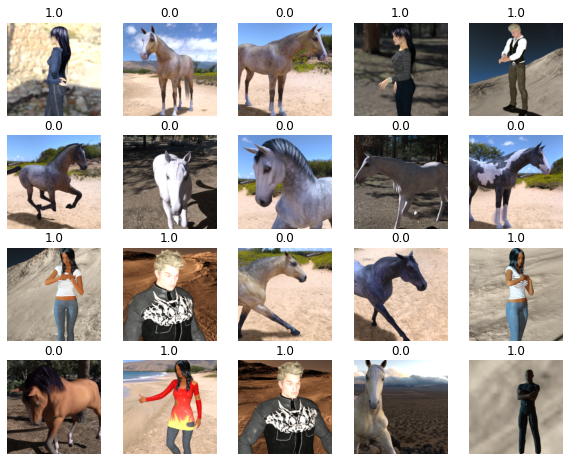

In [ ]:
### 시각화 
import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    #Your code here. Should at least have a rescale. Other parameters can help with overfitting.)
    rescale = 1/255., 
    # shear_range = 0.2, 
    # zoom_range = 0.2, 
    # horizontal_flip = True,
    # rotation_range=20, 
    # width_shift_range = 0.1, 
    # height_shift_range = 0.1
)
# 데이터소스의 위치, 이미지크기, 배치사이즈, 라벨
train_generator = train_datagen.flow_from_directory(
    #Your Code Here
    './tmp/horse-or-human/',
    target_size=(300,300),
    batch_size=32, 
    class_mode = 'binary'
    )

image, label = next(train_generator)

plt.figure(figsize=(10,10))
for n in range(20):
  plt.subplot(5,5,n+1)
  plt.imshow(image[n])
  plt.title(label[n])
  plt.axis('off')
plt.show()  